Видео лабораторной: https://youtu.be/wLw3GZVXJ6M

TG: https://t.me/data_science_news



---



In [ ]:
import numpy as np
import matplotlib.pylab as plt
from scipy.stats import norm, binom
from scipy.stats import fisher_exact

# Тетсирование биномиальных данных

## Задача №1 _(асимтотический двусторонний тест на одной выборке)_

В шахматном онлайн сервисе заявлено, что цвет фигур (черные или белые) между двумя игнроками выбирается случайно и независимо в свободныых партиях с вероятностью 50/50. Вы проанализировали 130 собственных партий и выяснили, что 69 раз вы играли черными фигурами. Так случайно вышло, что вы играли черными фигурами больше или существует какой то другой фактор влияющий на выбор цвета фигур?

In [ ]:
N=130
black=69
p_0=0.5

## Формализация задачи

Распределение данных по задаче можно выразить как последовательность независимых случайных величин Бернулли. Предположим, что $X_i=1$ если цвет фигур черный, и $X_i=0$ если белый. Таким образом, количество игр за черных в $N$ независимых итерациях выражено суммой $Y = \Sigma_{i=1}^N X_i$, которое подчиняется биномиальному распределению:

$p_Y(k;p)=P(Y=k)=\binom{n}{k}p^k(1-p)^{n-k}$, $k=0,1,...,N$

$\mathbb{E}[Y]=np$

$Var[Y]=np(1-p)$

По условию задачи мы должны протестировать гипотезу:

$H_0:\ p=0.5\ \mathrm{VS}\ H_A: p \neq 0.5$, где $p$ это параметр биномиального распределения.

### Асимтотичность - практическое правило


$0 < np_0 - 3 \sqrt{np_0(1-p_0)} < np_0 + 3 \sqrt{np_0(1-p_0)} < n$

_[Larsen, Marx, An introduction to mathmatical statistics and its application 5-th ED p.361]_

Если неравенство выполняется, то мы можем выполнить асимтотический тест.

При этом у нас есть два пути для выбора тест статистики:

1. Рассмотривать сумму $\Sigma_{i=1}^N X_i \sim N(np, np(1-p))$. Таким образом, нормализированная статистика будет иметь вид $\frac{\Sigma_{i=1}^N X_i-np}{\sqrt{np(1-p)}} \sim N(0,1)$

2. Расматривать выборочное среднее $\bar{X}_n = \frac{1}{n}\Sigma_{i=1}^N X_i \sim N(p,\frac{p(1-p)}{n})$, где нормализированный вариант будет  иметь вид $\sqrt{N}\frac{\bar{X}_N - p}{p(1-p)} \sim N(0,1)$

In [ ]:
print(N*p_0-3*np.sqrt(N)*p_0)
print(N*p_0+3*np.sqrt(N)*p_0)
print(0<N*p_0-3*np.sqrt(N)*p_0<N*p_0+3*np.sqrt(N)*p_0<N)

47.89736862351293
82.10263137648707
True


### Статистический критерий

Зафиксируем уровень статистической значимости $\alpha=0.05$. То есть вероятность того, что мы отклоним нулевую гипотезу, при том что она истинна равна 5% или $P(\mathrm{reject\ H_0}|\mathrm{H_0\ true})=0.05$.

В условиях нулевой гипотезы тест статистика имеет вид:

$$\frac{\Sigma_{i=1}^N X_i-np_0}{\sqrt{np_0(1-p_0)}}=\sqrt{N}\frac{\bar{X}_N - p_0}{\sqrt{p_0(1-p_0)}} \sim N(0,1)$$

Таким образом, статистический критерий выражен:

$$\psi_\alpha=\mathbb{1}\left[\frac{|\Sigma_{i=1}^N X_i-np_0|}{\sqrt{np_0(1-p_0)}}=\sqrt{N}\frac{|\bar{X}_N - p_0|}{\sqrt{p_0(1-p_0)}} > q_{\frac{\alpha}{2}}=1.96 \right] $$

In [ ]:
# alpha/2 quantile
print(np.round(norm.ppf(0.975), decimals=2))

# test statistics 1
test_stat_1 = np.abs(black-N*p_0)/np.sqrt(N*p_0*(1-p_0))
print(
    np.round(test_stat_1, decimals=3))

# test statistics 2
test_stat_2 = np.sqrt(N)*np.abs(black/N-p_0)/np.sqrt(p_0*(1-p_0))
print(
    np.round(test_stat_2, decimals=3))

# decision
print(
    'Is the null hypothesis rejected? / {}'.format(
        test_stat_1 > norm.ppf(0.975)
        )
    )

# p-value
print(np.round(1-norm.cdf(test_stat_1), decimals=2))

1.96
0.702
0.702
Is the null hypothesis rejected? / False
0.24


## Задача №2 _(точный двусторонний тест на одной выбоке)_

Предположим, что 21 пациент с редким заболеванием участвуют в исследовании лекартсва, которое изменяет болевой синдром. Известно, что действующий препарат эффективен в 80% случаев. Допустим у 19 пациентов уменьшился болевой синдром. Имеет ли новый препарат эффективность перед существующим перпаратом?


In [ ]:
p_0=0.8
N=21
alpha = 0.05

### Асимтотичность - практическое правило


$0 < np_0 - 3 \sqrt{np_0(1-p_0)} < np_0 + 3 \sqrt{np_0(1-p_0)} < n$

_[Larsen, Marx, An introduction to mathmatical statistics and its application 5-th ED p.361]_

In [ ]:
print(N*p_0-3*np.sqrt(N*p_0*(1-p_0)))
print(N*p_0+3*np.sqrt(N*p_0*(1-p_0)))
print(0<N*p_0-3*np.sqrt(N*p_0*(1-p_0))<N*p_0+3*np.sqrt(N*p_0*(1-p_0))<N)

11.300909166052993
22.29909083394701
False


### Формализация задачи

Распределение данных по задаче можно выразить как последовательность независимых случайных величин Бернулли. Предположим, что $X_i=1$ если у пациента уменьшился болевой синдром, и $X_i=0$ пациент не ощущает изменений. Таким образом, количество пациентиов, которые ощутили эффект в $N$ независимых итерациях выражено суммой $Y = \Sigma_{i=1}^N X_i$, которое в условиях нулевой гипотезы подчиняется биномиальному распределению:

$p_Y(k;p)=P(Y=k)=\binom{n}{k}p^k(1-p)^{n-k}=\binom{21}{k}0.8^k(1-0.8)^{21-k}$, $k=0,1,...,N$


По условию задачи мы должны протестировать гипотезу:

$H_0:\ p=0.8\ \mathrm{VS}\ H_A: p \neq 0.8$, где $p$ это параметр биномиального распределения.

In [ ]:
rv_binom = binom(N, p_0)
x = np.arange(0,22)
pmf_x = np.round(rv_binom.pmf(x), decimals=3)
print("\n".join("{} {}".format(x, y) for x, y in zip(x, pmf_x)))

0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.001
11 0.003
12 0.01
13 0.029
14 0.065
15 0.122
16 0.183
17 0.216
18 0.192
19 0.121
20 0.048
21 0.009


In [ ]:
right_bound = rv_binom.ppf(1 - alpha/2)
left_bound = rv_binom.ppf(alpha/2)
print('left bound is {}, right bound is {}'.format(left_bound, right_bound))

left bound is 13.0, right bound is 20.0


In [ ]:
print('P(Y<13)={}'.format(np.round(rv_binom.cdf(13), decimals=3)))
print('P(Y>20)={}'.format(np.round(1-rv_binom.cdf(20), decimals=3)))

P(Y<13)=0.043
P(Y>20)=0.009


Text(0.5, 0, '$Y$')

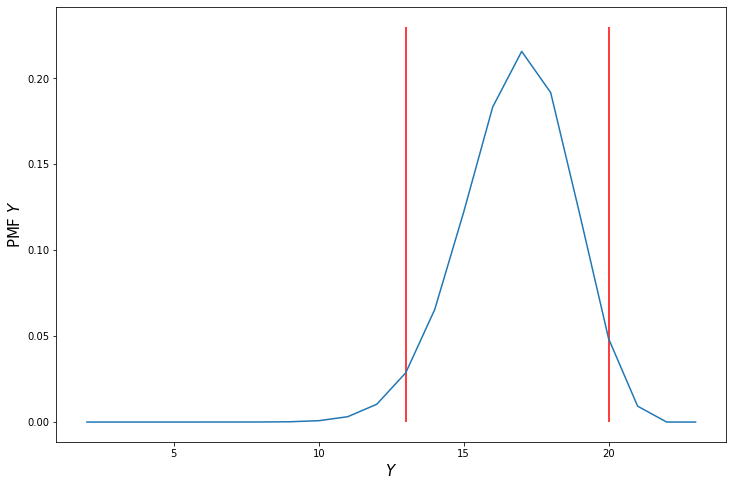

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(x+2, rv_binom.pmf(x+2))
plt.vlines([left_bound, right_bound],-0.00,+0.23, 'red')
plt.ylabel(r'PMF $Y$', fontsize = 15)
plt.xlabel(r'$Y$', fontsize = 15)

### Статистический критерий

Зафиксируем уровень статистической значимости $\alpha=0.05$. То есть вероятность того, что мы отклоним нулевую гипотезу, при том что она истинна равна 5% или $P(\mathrm{reject\ H_0}|\mathrm{H_0\ true})=0.05$.

Согласно распределению в условиях нулевой гипотезы $P(Y=k) = \binom{21}{k}0.8^k(1-0.8)^{21-k}$

$P(Y < 13)=0.043$

$P(Y > 20)=0.009$

Таким образом $P(\mathrm{reject\ H_0}|\mathrm{H_0\ true}) = P(Y < q_{\frac{\alpha}{2}}|\mathrm{H_0\ true}) + P(Y> q_{\frac{\alpha}{2}}|\mathrm{H_0\ true})=P(Y< 13|p=0.8) + P(Y> 20|p=0.8) \approx 0.05$

Определим критичесткую область:

$R_{\alpha}=\{Y:\ Y< 13\ \mathrm{or}\ Y > 20\}$

Согласно данным только 19 пациентов ощутили эффект. Значит, $Y=19 \notin R_{\alpha}$. Следовательно, **нулевая гипотеза сохраняется**.

## Задача №3 A/B-testing _(асимтотический, односторонний тест с двумя выборками)_

При проектировании web-сайта для нового продукта вы хотите принять решение относительно местоположения кнопки для перехода к заказу услуги. В ваших предыдущих проектах кнопка заказа располагется в нижней части страницы, однако, сейчас вы предполагаете, что зафиксировав конпку в другом месте вы сможете повысить количество нажатий.

Для сбора данных вы создаёте две версии сайта с разным местоположением кнопок. Далее, всем новым посетителям сервер случайно выбирает одну из двух версий сайта. Выполняя эксперимент два дня вы собрали следующие данные:

> Общее количество посетителей с традицонным расположением кнопки: 49, количество переходов: 28. Общее количество посетителей с альтернативным расположением элемента дизайна: 51, количество переходов 38.


Принимать ли новый дизайн в производство?




### Формализация задачи

По условию задачи мы имеем две выборки ($X$ - традиционная кнопка, $Y$ - альтернативная), где $\{X_i\ \mathrm{or}\ Y_i\}=1$ если пользователь нажал на кнопку при просмотре страницы и $0$ в противном случае.

Пусть $N=49$ и $M=51$ развер выборок для традиционного и альтернативного расположения кнопок. Тогда, $\bar{X}_N=\frac{1}{n}\sum_{i=1}^n X_i$ и $\bar{Y}_M=\frac{1}{n}\sum_{i=1}^M Y_i$ это выборочные средние для каждого наблюдения.

По центральной предельной теореме $\bar{X}_N \sim N(p_X, \frac{p_X(1-p_X)}{N})$ и $\bar{Y}_M \sim N(p_Y, \frac{p_Y(1-p_Y)}{M})$

Для решения задачи необходимо выполить тест:

$H_0:\ p_X=p_Y\ \mathrm{VS}\ H_A: p_Y > p_X$, где $p$ это параметр биномиального распределения.

### Статистический критерий

Зафиксируем уровень статистической значимости $\alpha=0.05$. То есть вероятность того, что мы отклоним нулевую гипотезу, при том что она истинна равна 5% или $P(\mathrm{reject\ H_0}|\mathrm{H_0\ true})=0.05$.

Известно, что $\mathbb{E}[\bar{X}_N]=p_X$ и $\mathbb{E}[\bar{Y}_M]=p_Y$.

Кроме этого, функция максимального правдоподобия, для двух выборок будет иметь вид:

$L(X_1,...,X_N, Y_1,...,Y_M;\ p_X,p_Y) =p_X^{\sum_{i=1}^N X_i}(1-p_X)^{N-\sum_{i=1}^N X_i} p_Y^{\sum_{i=1}^M Y_i}(1-p_Y)^{M-\sum_{i=1}^M Y_i}$

У условиях нулевой гипотезы $p_X=p_Y$, тогда, лог-функция максимального правдоподобия будет выражена:

$(\sum_{i=1}^N X_i + \sum_{i=1}^M Y_i)\log(p)+(N+M-\sum_{i=1}^N X_i-\sum_{i=1}^M Y_i)\log(1-p)$

Минимизация лог-функции максимального правдоподобия относительно $p$ даёт точный результат: $\hat{p}=\frac{\sum_{i=1}^N X_i+\sum_{i=1}^M Y_i}{N+M}$

Тогда, в условиях нулевой гипотезы, мы имеем следующую тест статистику:

$\frac{(\bar{Y}_M - \bar{Y}_M) - (p_Y - p_X)}{\sqrt{\frac{\hat{p}(1-\hat{p})}{M} + \frac{\hat{p}(1-\hat{p}}{N}}}=\sqrt{NM}\frac{\bar{Y}_M - \bar{Y}_M}{\sqrt{(N+M)(\hat{p}(1-\hat{p})}} \sim N(0,1)$

Таким образом, статистический критерий выражен:

$$\psi_\alpha=\mathbb{1}\left[\sqrt{NM}\frac{\bar{Y}_M - \bar{Y}_M}{\sqrt{(N+M)(\hat{p}(1-\hat{p})}} > q_{\alpha}=1.65 \right] $$

In [ ]:
# data
alpha=0.05
N = 49
M = 51
sum_x = 28
sum_y = 38

# quantile
q_alpha = norm.ppf(0.95)
print('Quantile 5% is {}'.format(np.round(q_alpha, decimals=3)))

# p under null
mle_p = (sum_x + sum_y)/(N+M)
print('p under null is {}'.format(np.round(mle_p, decimals=3)))

# test statistic
test_value = np.sqrt(N*M)*(sum_y/M - sum_x/N)*(1/np.sqrt((N+M)*(mle_p*(1-mle_p))))
print('test statistic is {}'.format(np.round(test_value, decimals=3)))

# decision
print(
    'Is the null hypothesis rejected? / {}'.format(
        test_value > q_alpha
        )
    )

# p-value
print(np.round(1-norm.cdf(test_value), decimals=2))

Quantile 5% is 1.645
p under null is 0.66
test statistic is 1.833
Is the null hypothesis rejected? / True
0.03


### Альтернативное решение - точный тест Фишера

Простое [руководство](https://www.sheffield.ac.uk/polopoly_fs/1.43998!/file/tutorial-9-fishers.pdf) для двух выборок.

Нулевая гипотеза: **никакого эффекта от изменений нет**.

|                  |Алтернативная кнопка  | Традиционная кнопка  | Итого_______
-------------------|-------------------|------------------|------------------
| Переходы          |38 ($a$)           | 28 ($b$)         | 66 ($a+b$)
| Отсутствие перехода  |13 ($c$)           | 21 ($d$)         | 34 ($c+d$)
| Итого             | 51 ($a+c$)        | 49 ($b+d$)       | 100 ($n$)

Тогда вероятность получить данные как в таблице, в условиях нулевой гипотезы выражены:

$$P=\frac{(a+b)!(c+d)!(a+c)!(b+d)!}{a!b!c!d!n!}$$

P-value в условиях точного теста Фишера, это сумма вероятностей более экстримальных вариантов, т.е.: $\mathrm{P-value}=P(a=38,b=27)+P(a=39,b=26)+...+P(a=51,b=15)$


In [ ]:
# a=38, b=28
(
    np.math.factorial(66)*np.math.factorial(34)*np.math.factorial(51)*np.math.factorial(49)
    )/(
        np.math.factorial(38)*np.math.factorial(28)*np.math.factorial(13)*np.math.factorial(21)*np.math.factorial(100)
        )

0.03202576668586309

In [ ]:
# a=39, b=27
(
    np.math.factorial(66)*np.math.factorial(34)*np.math.factorial(51)*np.math.factorial(49)
    )/(
        np.math.factorial(39)*np.math.factorial(27)*np.math.factorial(12)*np.math.factorial(22)*np.math.factorial(100)
        )

0.013586688897032826

In [ ]:
# a=40, b=26
(
    np.math.factorial(66)*np.math.factorial(34)*np.math.factorial(51)*np.math.factorial(49)
    )/(
        np.math.factorial(40)*np.math.factorial(26)*np.math.factorial(11)*np.math.factorial(23)*np.math.factorial(100)
        )

0.00478487739417243

In [ ]:
# a=41, b=25
(
    np.math.factorial(66)*np.math.factorial(34)*np.math.factorial(51)*np.math.factorial(49)
    )/(
        np.math.factorial(41)*np.math.factorial(25)*np.math.factorial(10)*np.math.factorial(24)*np.math.factorial(100)
        )

0.0013907265596883284

In [ ]:
# a=42, b=24
(
    np.math.factorial(66)*np.math.factorial(34)*np.math.factorial(51)*np.math.factorial(49)
    )/(
        np.math.factorial(42)*np.math.factorial(24)*np.math.factorial(9)*np.math.factorial(25)*np.math.factorial(100)
        )

0.00033112537135436386

In [ ]:
probs = []
k=0
for i in range(38, 51, 1):
  probs.append((
    np.math.factorial(66)*np.math.factorial(34)*np.math.factorial(51)*np.math.factorial(49)
    )/(
        np.math.factorial(i)*np.math.factorial(28-k)*np.math.factorial(51-i)*np.math.factorial(21+k)*np.math.factorial(100)
        ))
  k=k+1

In [ ]:
sum(probs)

0.05219440145192389

In [ ]:
table = np.array([[38,28],[13,21]])
oddsr, p = fisher_exact(table, alternative='greater')
print(p)

0.052194401451926706
